In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("FirstSparkSessionApp").getOrCreate()

24/12/09 10:12:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/09 10:12:56 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/12/09 10:12:56 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
df = spark.read.format('json').load('data/2015-summary.json')#, inferSchema=True, header=True)

In [3]:
df.schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

In [4]:
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



## Row 클래스, 단일 레코드(행)을 나타내는 객체

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),

In [5]:
df.take(5)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [6]:
df.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



In [8]:
#spark DataTable 프로젝션
df.select("DEST_COUNTRY_NAME").show(5)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
|    United States|
|            Egypt|
|    United States|
+-----------------+
only showing top 5 rows



In [9]:
df.count()

256

In [10]:
df_dup2 = df.select('DEST_COUNTRY_NAME').dropDuplicates()


In [11]:
df_dup2.show()

+--------------------+
|   DEST_COUNTRY_NAME|
+--------------------+
|            Anguilla|
|              Russia|
|            Paraguay|
|             Senegal|
|              Sweden|
|            Kiribati|
|              Guyana|
|         Philippines|
|            Djibouti|
|            Malaysia|
|           Singapore|
|                Fiji|
|              Turkey|
|                Iraq|
|             Germany|
|              Jordan|
|               Palau|
|Turks and Caicos ...|
|              France|
|              Greece|
+--------------------+
only showing top 20 rows



In [16]:
df_dup1.show()

+--------------------+
|   DEST_COUNTRY_NAME|
+--------------------+
|            Anguilla|
|              Russia|
|            Paraguay|
|             Senegal|
|              Sweden|
|            Kiribati|
|              Guyana|
|         Philippines|
|            Djibouti|
|            Malaysia|
|           Singapore|
|                Fiji|
|              Turkey|
|                Iraq|
|             Germany|
|              Jordan|
|               Palau|
|Turks and Caicos ...|
|              France|
|              Greece|
+--------------------+
only showing top 20 rows



In [21]:
df_dup3= df.select('DEST_COUNTRY_NAME').dropDuplicates().cache()
df_dup3.show()

24/12/06 16:06:24 WARN CacheManager: Asked to cache already cached data.


+--------------------+
|   DEST_COUNTRY_NAME|
+--------------------+
|            Anguilla|
|              Russia|
|            Paraguay|
|             Senegal|
|              Sweden|
|            Kiribati|
|              Guyana|
|         Philippines|
|            Djibouti|
|            Malaysia|
|           Singapore|
|                Fiji|
|              Turkey|
|                Iraq|
|             Germany|
|              Jordan|
|               Palau|
|Turks and Caicos ...|
|              France|
|              Greece|
+--------------------+
only showing top 20 rows



In [15]:
df_dup2.show()

+--------------------+
|   DEST_COUNTRY_NAME|
+--------------------+
|            Anguilla|
|              Russia|
|            Paraguay|
|             Senegal|
|              Sweden|
|            Kiribati|
|              Guyana|
|         Philippines|
|            Djibouti|
|            Malaysia|
|           Singapore|
|                Fiji|
|              Turkey|
|                Iraq|
|             Germany|
|              Jordan|
|               Palau|
|Turks and Caicos ...|
|              France|
|              Greece|
+--------------------+
only showing top 20 rows



In [28]:
df_dup.count()

132

In [31]:
df_dup.distinct().count()

132

In [26]:
df_dup1.count()

132

In [27]:
df_dup3.count()

132

In [12]:
df.sort('DEST_COUNTRY_NAME').show() #셔플

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|             Algeria|      United States|    4|
|              Angola|      United States|   15|
|            Anguilla|      United States|   41|
| Antigua and Barbuda|      United States|  126|
|           Argentina|      United States|  180|
|               Aruba|      United States|  346|
|           Australia|      United States|  329|
|             Austria|      United States|   62|
|          Azerbaijan|      United States|   21|
|             Bahrain|      United States|   19|
|            Barbados|      United States|  154|
|             Belgium|      United States|  259|
|              Belize|      United States|  188|
|             Bermuda|      United States|  183|
|             Bolivia|      United States|   30|
|Bonaire, Sint Eus...|      United States|   58|
|              Brazil|      United States|  853|
|British Virgin Is..

In [13]:
from pyspark.sql.functions import expr

In [33]:
df3 = df.withColumn('withInCountry', expr('ORIGIN_COUNTRY_NAME==DEST_COUNTRY_NAME'))

In [34]:
df3.show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [14]:
#SQL 구문 CASE WHEN > 수치형 변수 > 명목형 변수로 변환 > 파생변수
df4 = df.withColumn('category', expr('CASE WHEN count<10 THEN "under" WHEN count>=10 THEN "upper" END'))

In [15]:
df4.show(5)

+-----------------+-------------------+-----+--------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|category|
+-----------------+-------------------+-----+--------+
|    United States|            Romania|   15|   upper|
|    United States|            Croatia|    1|   under|
|    United States|            Ireland|  344|   upper|
|            Egypt|      United States|   15|   upper|
|    United States|              India|   62|   upper|
+-----------------+-------------------+-----+--------+
only showing top 5 rows



In [ ]:
# count 2배 해보세요


In [16]:
df5 = df4.withColumn('withInCountry', expr('ORIGIN_COUNTRY_NAME==DEST_COUNTRY_NAME'))

In [17]:
df5.show(5)

+-----------------+-------------------+-----+--------+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|category|withInCountry|
+-----------------+-------------------+-----+--------+-------------+
|    United States|            Romania|   15|   upper|        false|
|    United States|            Croatia|    1|   under|        false|
|    United States|            Ireland|  344|   upper|        false|
|            Egypt|      United States|   15|   upper|        false|
|    United States|              India|   62|   upper|        false|
+-----------------+-------------------+-----+--------+-------------+
only showing top 5 rows



In [18]:
df5.groupBy("withInCountry").count().show()

+-------------+-----+
|withInCountry|count|
+-------------+-----+
|         true|    1|
|        false|  255|
+-------------+-----+



## Projection 과 Filter

```
select a,b,c  # projection > column > Transformation select('colname')
from TableA  
where a>10  #filter > Row >Transformation where('cond')
```


In [19]:
df6 = df5.where('count<5' )

In [20]:
df6.show()

+--------------------+-------------------+-----+--------+-------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|category|withInCountry|
+--------------------+-------------------+-----+--------+-------------+
|       United States|            Croatia|    1|   under|        false|
|       United States|          Singapore|    1|   under|        false|
|             Moldova|      United States|    1|   under|        false|
|               Malta|      United States|    1|   under|        false|
|             Algeria|      United States|    4|   under|        false|
|       United States|          Gibraltar|    1|   under|        false|
|Saint Vincent and...|      United States|    1|   under|        false|
|            Suriname|      United States|    1|   under|        false|
|       United States|             Cyprus|    1|   under|        false|
|       United States|           Malaysia|    3|   under|        false|
|            Thailand|      United States|    3|   under|       

In [43]:
df6.count()

46

where a>10 and b!=1 

In [47]:
df7 = df5.where('count<5' ).where('ORIGIN_COUNTRY_NAME != "United States"')
df7.show()

+-----------------+-------------------+-----+--------+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|category|withInCountry|
+-----------------+-------------------+-----+--------+-------------+
|    United States|            Croatia|    1|   under|        false|
|    United States|          Singapore|    1|   under|        false|
|    United States|          Gibraltar|    1|   under|        false|
|    United States|             Cyprus|    1|   under|        false|
|    United States|           Malaysia|    3|   under|        false|
|    United States|            Vietnam|    2|   under|        false|
|    United States|            Estonia|    1|   under|        false|
|    United States|            Hungary|    3|   under|        false|
|    United States|           Thailand|    4|   under|        false|
|    United States|            Liberia|    2|   under|        false|
|    United States|              Malta|    2|   under|        false|
|    United States|          Lithu

In [ ]:
#프로젝션, 필터링 연습을 진행해 봅니다.

In [53]:
df5.groupBy('withInCountry').count().show()

+-------------+-----+
|withInCountry|count|
+-------------+-----+
|         true|    1|
|        false|  255|
+-------------+-----+



In [21]:
#국내 여행 카운트를 확인합니다.
df5.where('withInCountry==true').show()

+-----------------+-------------------+------+--------+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|category|withInCountry|
+-----------------+-------------------+------+--------+-------------+
|    United States|      United States|370002|   upper|         true|
+-----------------+-------------------+------+--------+-------------+



In [ ]:
#upper 인 ORIGIN_COUNTRY_NAME별 평균 카운트

In [ ]:
#카운트가 200 이상인 ORIGIN_COUNTRY_NAME

In [ ]:
#국내 여행이 아니면서 가장 횟수가 많은 ORIGIN_COUNTRY_NAME top 10을  추출해보세요

In [ ]:
#국내 여행이 아니면서 가장 횟수가 적은 ORIGIN_COUNTRY_NAME top 10을  추출해보세요

In [ ]:
#도착국가별 count 총합이 가장 많은 top10을 추출해 보세요

In [22]:
spark.stop()

# 집계 함수

In [23]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SecondSparkSessionApp").getOrCreate()

24/12/09 10:30:16 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/12/09 10:30:16 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [24]:
df = spark.read.format("csv")\
    .option("header", 'true')\
    .option('inferSchema', 'true')\
    .load('data/emp.csv')


In [25]:
df.printSchema()

root
 |-- empno: integer (nullable = true)
 |-- ename: string (nullable = true)
 |-- job: string (nullable = true)
 |-- mgr: integer (nullable = true)
 |-- hiredate: string (nullable = true)
 |-- sal: integer (nullable = true)
 |-- comm: integer (nullable = true)
 |-- deptno: integer (nullable = true)



In [27]:
df.show()

+-----+------+---------+----+----------+----+----+------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|
+-----+------+---------+----+----------+----+----+------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800|null|    20|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250|1400|    30|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|
| 7844|TURNER| SALESMAN|7698|1981-09-08|1500|   0|    30|
| 7876| ADAMS|    CLERK|7788|1987-05-23|1100|null|    20|
| 7900| JAMES|    CLERK|7698|1981-12-03| 950|null|    30|
| 7902|  FORD|  ANALYST|7566|1981-12-03|3000|null|    20|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|
| 9292|  JACK|

In [26]:
df.select('ename', 'deptno').show()

+------+------+
| ename|deptno|
+------+------+
| SMITH|    20|
| ALLEN|    30|
|  WARD|    30|
| JONES|    20|
|MARTIN|    30|
| BLAKE|    30|
| CLARK|    10|
| SCOTT|    20|
|  KING|    10|
|TURNER|    30|
| ADAMS|    20|
| JAMES|    30|
|  FORD|    20|
|MILLER|    10|
|  JACK|    70|
+------+------+



In [28]:
df.select('ename', 'deptno').where('deptno=20').show()

+-----+------+
|ename|deptno|
+-----+------+
|SMITH|    20|
|JONES|    20|
|SCOTT|    20|
|ADAMS|    20|
| FORD|    20|
+-----+------+



In [ ]:
# 카운트 집계

In [30]:
from pyspark.sql.functions import count

In [31]:
df.select(count('job')).show()  #null 값 제외

+----------+
|count(job)|
+----------+
|        15|
+----------+



In [32]:
df.selectExpr('count(*)').show()  #null 포함

+--------+
|count(1)|
+--------+
|      15|
+--------+



In [33]:
df.select('job').distinct().show()

+---------+
|      job|
+---------+
|  ANALYST|
| SALESMAN|
|    CLERK|
|  MANAGER|
|PRESIDENT|
+---------+



In [34]:
df.select('job').distinct().count() #정확

5

In [41]:
from pyspark.sql.functions import countDistinct, approx_count_distinct

In [37]:
df.select(countDistinct('job')).show() #근사치

+-------------------+
|count(DISTINCT job)|
+-------------------+
|                  5|
+-------------------+



In [42]:
df.select(approx_count_distinct('job', 0.1)).show()  #성능면에서 유리한 연산

+--------------------------+
|approx_count_distinct(job)|
+--------------------------+
|                         5|
+--------------------------+



In [60]:
from pyspark.sql.functions import first, last, min, max, sum, avg

In [44]:
df.select(first('ename'), last('ename')).show()

+------------+-----------+
|first(ename)|last(ename)|
+------------+-----------+
|       SMITH|       JACK|
+------------+-----------+



In [ ]:
#min, max

In [46]:
df.select(min('sal'), max('sal')).show()

+--------+--------+
|min(sal)|max(sal)|
+--------+--------+
|     800|    5000|
+--------+--------+



In [49]:
df.select(count('empno'), count('*'), max('ename'), min('ename')).show()

+------------+--------+----------+----------+
|count(empno)|count(1)|max(ename)|min(ename)|
+------------+--------+----------+----------+
|          15|      15|      WARD|     ADAMS|
+------------+--------+----------+----------+



In [56]:
df.select(sum('sal')).show() #sal 컬럼의 총합

+--------+
|sum(sal)|
+--------+
|   32225|
+--------+



In [57]:
#sal 컬럼값의 중복을 제거하고 합산
#df.select().distinct().sum()
df.selectExpr( 'sum( distinct sal )' ).show()

+-----------------+
|sum(DISTINCT sal)|
+-----------------+
|            27975|
+-----------------+



In [64]:
#alias
dfs = df.select( count('sal').alias('total_tx') ,
                    sum('sal').alias('total_salary'),
                    avg('sal').alias('avg_salary'),
                    expr('mean(sal)').alias('mean_salary')
               )
dfs.show()

+--------+------------+------------------+------------------+
|total_tx|total_salary|        avg_salary|       mean_salary|
+--------+------------+------------------+------------------+
|      15|       32225|2148.3333333333335|2148.3333333333335|
+--------+------------+------------------+------------------+



In [ ]:
#round(data,자릿수)


# 그룹화

In [68]:
df.groupBy('job').count().show()

+---------+-----+
|      job|count|
+---------+-----+
|  ANALYST|    2|
| SALESMAN|    4|
|    CLERK|    5|
|  MANAGER|    3|
|PRESIDENT|    1|
+---------+-----+



In [69]:
# agg() 집계함수 적용
dfs = df.groupBy('job').agg( expr('avg(sal) as SAL_AVG'))


In [70]:
dfs.show()

+---------+------------------+
|      job|           SAL_AVG|
+---------+------------------+
|  ANALYST|            3000.0|
| SALESMAN|            1400.0|
|    CLERK|            1470.0|
|  MANAGER|2758.3333333333335|
|PRESIDENT|            5000.0|
+---------+------------------+



In [ ]:
#sal 표준편차
#1. sql.function stddev()
#2. sql expression

In [71]:
df.groupBy('job').agg( expr('stddev_pop(sal) as SAL_STDEV') ).show()

+---------+------------------+
|      job|         SAL_STDEV|
+---------+------------------+
|  ANALYST|               0.0|
| SALESMAN|154.11035007422439|
|    CLERK| 880.6815542521599|
|  MANAGER|223.91714737574006|
|PRESIDENT|               0.0|
+---------+------------------+



In [ ]:
#round()

In [ ]:
# groupby 집계

# 윈도우함수

순위, 정렬 -  rank, row_number, dense_rank
누계 - sum, avg, max, min + over()
이동평균, 이동합계 - over + rowsBetween, rangeBetween
시차, 선행 - lag, lead

ex) 세션 구간내 분석, 특정시간 동안 일어난 활동 그룹화

In [ ]:
1. partitionBy()  > 소그룹으로 나눈다.
2. orderBy()  > 소그룹 내 정렬
3. rowBetween(), rangeBetween()
4. over()

In [75]:
from pyspark.sql.window import Window
from pyspark.sql.functions import desc, rank

#순위를 부여하려고 하는 데이터의 범위 > 윈도우 명세 설정
windowspec = Window.orderBy(desc('sal'))

In [76]:
#순위객체
salAllRank = rank().over(windowspec)  

In [77]:
salAllRank

Column<'RANK() OVER (ORDER BY sal DESC NULLS LAST unspecifiedframe$())'>

In [78]:
#데이터프레임에 컬럼으로 추가 > 액션
df.withColumn("salary_rank", salAllRank).show()

24/12/09 13:38:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----+------+---------+----+----------+----+----+------+-----------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|salary_rank|
+-----+------+---------+----+----------+----+----+------+-----------+
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|          1|
| 9292|  JACK|    CLERK|7782|1982-01-23|3200|null|    70|          2|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|          3|
| 7902|  FORD|  ANALYST|7566|1981-12-03|3000|null|    20|          3|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|          5|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|          6|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|          7|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|          8|
| 7844|TURNER| SALESMAN|7698|1981-09-08|1500|   0|    30|          9|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|         10|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|         11|
| 7654|MARTIN| SALES

In [85]:
from pyspark.sql.functions import col
df.select( 'empno', salAllRank.alias('salary_rank') ).show()

+-----+-----------+
|empno|salary_rank|
+-----+-----------+
| 7839|          1|
| 9292|          2|
| 7788|          3|
| 7902|          3|
| 7566|          5|
| 7698|          6|
| 7782|          7|
| 7499|          8|
| 7844|          9|
| 7934|         10|
| 7521|         11|
| 7654|         11|
| 7876|         13|
| 7900|         14|
| 7369|         15|
+-----+-----------+



24/12/09 13:44:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [90]:
#windowspec = Window.orderBy(desc('sal'))
windowspec1 = Window.partitionBy('job').orderBy(desc('sal'))

In [95]:
salJobRank = rank().over(windowspec1)

In [96]:
df.select(
    'job', 'ename', 'sal',
    salJobRank.alias('salJobRank')
).show()

+---------+------+----+----------+
|      job| ename| sal|salJobRank|
+---------+------+----+----------+
|  ANALYST| SCOTT|3000|         1|
|  ANALYST|  FORD|3000|         1|
| SALESMAN| ALLEN|1600|         1|
| SALESMAN|TURNER|1500|         2|
| SALESMAN|  WARD|1250|         3|
| SALESMAN|MARTIN|1250|         3|
|    CLERK|  JACK|3200|         1|
|    CLERK|MILLER|1300|         2|
|    CLERK| ADAMS|1100|         3|
|    CLERK| JAMES| 950|         4|
|    CLERK| SMITH| 800|         5|
|  MANAGER| JONES|2975|         1|
|  MANAGER| BLAKE|2850|         2|
|  MANAGER| CLARK|2450|         3|
|PRESIDENT|  KING|5000|         1|
+---------+------+----+----------+



In [97]:
#부서별 급여 순위 생성
dept_window_spec = Window.partitionBy('deptno').orderBy(desc('sal'))

In [99]:
new_df = df.withColumn( 'dept_salary_rank', rank().over(dept_window_spec))
new_df.select(
    'ename', 'deptno', 'sal', 'dept_salary_rank'
).show()

+------+------+----+----------------+
| ename|deptno| sal|dept_salary_rank|
+------+------+----+----------------+
| SCOTT|    20|3000|               1|
|  FORD|    20|3000|               1|
| JONES|    20|2975|               3|
| ADAMS|    20|1100|               4|
| SMITH|    20| 800|               5|
|  KING|    10|5000|               1|
| CLARK|    10|2450|               2|
|MILLER|    10|1300|               3|
|  JACK|    70|3200|               1|
| BLAKE|    30|2850|               1|
| ALLEN|    30|1600|               2|
|TURNER|    30|1500|               3|
|  WARD|    30|1250|               4|
|MARTIN|    30|1250|               4|
| JAMES|    30| 950|               6|
+------+------+----+----------------+



In [101]:
from pyspark.sql.functions import row_number
new_df = df.withColumn( 'dept_salary_rank', row_number().over(dept_window_spec))
new_df.select(
    'ename', 'deptno', 'sal', 'dept_salary_rank'
).show()

+------+------+----+----------------+
| ename|deptno| sal|dept_salary_rank|
+------+------+----+----------------+
| SCOTT|    20|3000|               1|
|  FORD|    20|3000|               2|
| JONES|    20|2975|               3|
| ADAMS|    20|1100|               4|
| SMITH|    20| 800|               5|
|  KING|    10|5000|               1|
| CLARK|    10|2450|               2|
|MILLER|    10|1300|               3|
|  JACK|    70|3200|               1|
| BLAKE|    30|2850|               1|
| ALLEN|    30|1600|               2|
|TURNER|    30|1500|               3|
|  WARD|    30|1250|               4|
|MARTIN|    30|1250|               5|
| JAMES|    30| 950|               6|
+------+------+----+----------------+



In [103]:
from pyspark.sql.functions import dense_rank
new_df = df.withColumn( 'dept_salary_rank', dense_rank().over(dept_window_spec))
new_df.select(
    'ename', 'deptno', 'sal', 'dept_salary_rank'
).show()

+------+------+----+----------------+
| ename|deptno| sal|dept_salary_rank|
+------+------+----+----------------+
| SCOTT|    20|3000|               1|
|  FORD|    20|3000|               1|
| JONES|    20|2975|               2|
| ADAMS|    20|1100|               3|
| SMITH|    20| 800|               4|
|  KING|    10|5000|               1|
| CLARK|    10|2450|               2|
|MILLER|    10|1300|               3|
|  JACK|    70|3200|               1|
| BLAKE|    30|2850|               1|
| ALLEN|    30|1600|               2|
|TURNER|    30|1500|               3|
|  WARD|    30|1250|               4|
|MARTIN|    30|1250|               4|
| JAMES|    30| 950|               5|
+------+------+----+----------------+



In [106]:
#누적 급여 계산
from pyspark.sql.functions import dense_rank
sum_window_spec = Window.partitionBy('deptno').orderBy('empno')


In [107]:
new_df = df.withColumn( 'cum_salary', sum('sal').over(sum_window_spec))
new_df.select(
    'ename', 'deptno', 'sal', 'cum_salary'
).show()

+------+------+----+----------+
| ename|deptno| sal|cum_salary|
+------+------+----+----------+
| SMITH|    20| 800|       800|
| JONES|    20|2975|      3775|
| SCOTT|    20|3000|      6775|
| ADAMS|    20|1100|      7875|
|  FORD|    20|3000|     10875|
| CLARK|    10|2450|      2450|
|  KING|    10|5000|      7450|
|MILLER|    10|1300|      8750|
|  JACK|    70|3200|      3200|
| ALLEN|    30|1600|      1600|
|  WARD|    30|1250|      2850|
|MARTIN|    30|1250|      4100|
| BLAKE|    30|2850|      6950|
|TURNER|    30|1500|      8450|
| JAMES|    30| 950|      9400|
+------+------+----+----------+



In [ ]:
#부서별 평균급여 avg('sal')

#sql select문
```
SELECT  #projection
ename, deptno, sal,
avg('sal').over(partition by deptno) as dept_avg_salary
from emp;  #filter
```

In [110]:
from pyspark.sql.functions import dense_rank
avg_window_spec = Window.partitionBy('deptno')
new_avg_df = df.withColumn('dept_avg_salary', avg('sal').over(avg_window_spec))
new_avg_df.select('empno', 'deptno', 'dept_avg_salary',).show()

+-----+------+------------------+
|empno|deptno|   dept_avg_salary|
+-----+------+------------------+
| 7369|    20|            2175.0|
| 7566|    20|            2175.0|
| 7788|    20|            2175.0|
| 7876|    20|            2175.0|
| 7902|    20|            2175.0|
| 7782|    10|2916.6666666666665|
| 7839|    10|2916.6666666666665|
| 7934|    10|2916.6666666666665|
| 9292|    70|            3200.0|
| 7499|    30|1566.6666666666667|
| 7521|    30|1566.6666666666667|
| 7654|    30|1566.6666666666667|
| 7698|    30|1566.6666666666667|
| 7844|    30|1566.6666666666667|
| 7900|    30|1566.6666666666667|
+-----+------+------------------+



```
select 
ename, deptno, sal,
LAG(sal)  OVER( partition by deptno order by empno ) as prev_salary
LEAD(sal) OVER( partition by deptno order by empno ) as next_salary
from emp;
```

In [112]:
#lead, lag 이전 급여 , 이후 급여
from pyspark.sql.functions import lag, lead

row_window_spec = Window.partitionBy('deptno').orderBy('empno')

#이전급여 컬럼, 이후급여 컬럼 2개 추가
lead_lagg_sal_df = df.withColumn('prev_salary', lag('sal').over(row_window_spec))\
            .withColumn('next_salary', lead('sal').over(row_window_spec))

lead_lagg_sal_df.select('ename', 'deptno', 'sal',  'prev_salary', 'next_salary').show()


+------+------+----+-----------+-----------+
| ename|deptno| sal|prev_salary|next_salary|
+------+------+----+-----------+-----------+
| SMITH|    20| 800|       null|       2975|
| JONES|    20|2975|        800|       3000|
| SCOTT|    20|3000|       2975|       1100|
| ADAMS|    20|1100|       3000|       3000|
|  FORD|    20|3000|       1100|       null|
| CLARK|    10|2450|       null|       5000|
|  KING|    10|5000|       2450|       1300|
|MILLER|    10|1300|       5000|       null|
|  JACK|    70|3200|       null|       null|
| ALLEN|    30|1600|       null|       1250|
|  WARD|    30|1250|       1600|       1250|
|MARTIN|    30|1250|       1250|       2850|
| BLAKE|    30|2850|       1250|       1500|
|TURNER|    30|1500|       2850|        950|
| JAMES|    30| 950|       1500|       null|
+------+------+----+-----------+-----------+



# rollup, cube

over(), groupby()
rollup : 계층적집계, 부분합(subtotal), 총합(grandtotal)
cube : 모든 값으로 부분합 , 결합 가능합 모든 값의 부분합을 구한다.

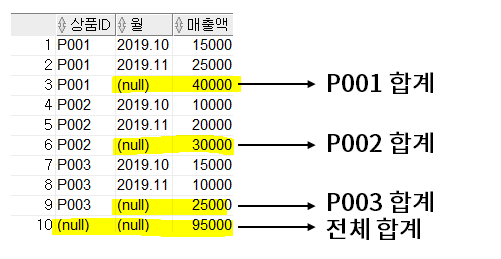

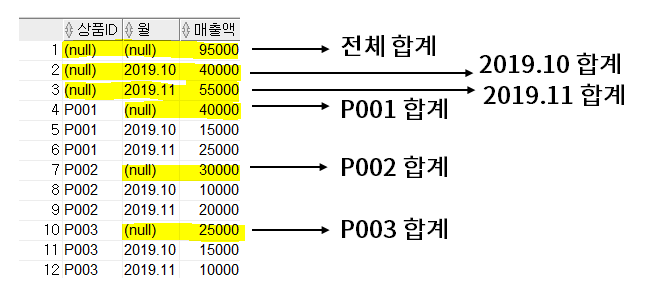

In [113]:
df

DataFrame[empno: int, ename: string, job: string, mgr: int, hiredate: string, sal: int, comm: int, deptno: int]

In [117]:
#그룹화 > 소계

df.groupBy('deptno', 'job').agg(count('*'),sum('sal')).orderBy('deptno', 'job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|sum(sal)|
+------+---------+--------+--------+
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|  ANALYST|       2|    6000|
|    20|    CLERK|       2|    1900|
|    20|  MANAGER|       1|    2975|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    5600|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+



In [119]:
df.rollup('deptno', 'job').agg(count('*'), sum('sal')).orderBy('deptno', 'job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|sum(sal)|
+------+---------+--------+--------+
|  null|     null|      15|   32225|
|    10|     null|       3|    8750|
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|     null|       5|   10875|
|    20|  ANALYST|       2|    6000|
|    20|    CLERK|       2|    1900|
|    20|  MANAGER|       1|    2975|
|    30|     null|       6|    9400|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    5600|
|    70|     null|       1|    3200|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+



In [120]:
df.cube('deptno', 'job').agg(count('*'), sum('sal')).orderBy('deptno', 'job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|sum(sal)|
+------+---------+--------+--------+
|  null|     null|      15|   32225|
|  null|  ANALYST|       2|    6000|
|  null|    CLERK|       5|    7350|
|  null|  MANAGER|       3|    8275|
|  null|PRESIDENT|       1|    5000|
|  null| SALESMAN|       4|    5600|
|    10|     null|       3|    8750|
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|     null|       5|   10875|
|    20|  ANALYST|       2|    6000|
|    20|    CLERK|       2|    1900|
|    20|  MANAGER|       1|    2975|
|    30|     null|       6|    9400|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    5600|
|    70|     null|       1|    3200|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+



In [ ]:
#롤업 -> 대,중분류 최대/최소값 

```
select
    deptno, job,
    max(sal) as max_sal,
    min(sal) as min_sal,
from emp
group by rollup(deptno, job)
order by deptno, job;
```

In [123]:
df.rollup('deptno', 'job').agg( max('sal').alias('max_sal'), min('sal').alias('min_sal') ).orderBy('deptno', 'job').show()

+------+---------+-------+-------+
|deptno|      job|max_sal|min_sal|
+------+---------+-------+-------+
|  null|     null|   5000|    800|
|    10|     null|   5000|   1300|
|    10|    CLERK|   1300|   1300|
|    10|  MANAGER|   2450|   2450|
|    10|PRESIDENT|   5000|   5000|
|    20|     null|   3000|    800|
|    20|  ANALYST|   3000|   3000|
|    20|    CLERK|   1100|    800|
|    20|  MANAGER|   2975|   2975|
|    30|     null|   2850|    950|
|    30|    CLERK|    950|    950|
|    30|  MANAGER|   2850|   2850|
|    30| SALESMAN|   1600|   1250|
|    70|     null|   3200|   3200|
|    70|    CLERK|   3200|   3200|
+------+---------+-------+-------+



In [ ]:
#job 별 평균급여 job, avg_salary, total_salary

In [128]:
df.rollup('job').agg(avg('sal').alias('avg_sal'), sum('sal').alias('total_sal')).orderBy('job').show()

+---------+------------------+---------+
|      job|           avg_sal|total_sal|
+---------+------------------+---------+
|     null|2148.3333333333335|    32225|
|  ANALYST|            3000.0|     6000|
|    CLERK|            1470.0|     7350|
|  MANAGER|2758.3333333333335|     8275|
|PRESIDENT|            5000.0|     5000|
| SALESMAN|            1400.0|     5600|
+---------+------------------+---------+



In [ ]:
#dpetno, job 평균급여, 최대급여를 모두 소계를 냅니다. -cube

select
    deptno, job,
    avg(sal) as avg_sal,
    max(sal) as max_sal,
from emp
group by cube(deptno, job)
order by deptno, job;


In [130]:
from pyspark.sql.functions import round
df.cube('deptno', 'job')\
    .agg( \
        count('*'),  
        round(avg('sal'),2).alias('avg_sal'),
        max('sal').alias('max_sal'))\
    .orderBy('deptno', 'job')\
    .select('deptno', 'job', 'avg_sal', 'max_sal')\
    .show()
    


+------+---------+-------+-------+
|deptno|      job|avg_sal|max_sal|
+------+---------+-------+-------+
|  null|     null|2148.33|   5000|
|  null|  ANALYST| 3000.0|   3000|
|  null|    CLERK| 1470.0|   3200|
|  null|  MANAGER|2758.33|   2975|
|  null|PRESIDENT| 5000.0|   5000|
|  null| SALESMAN| 1400.0|   1600|
|    10|     null|2916.67|   5000|
|    10|    CLERK| 1300.0|   1300|
|    10|  MANAGER| 2450.0|   2450|
|    10|PRESIDENT| 5000.0|   5000|
|    20|     null| 2175.0|   3000|
|    20|  ANALYST| 3000.0|   3000|
|    20|    CLERK|  950.0|   1100|
|    20|  MANAGER| 2975.0|   2975|
|    30|     null|1566.67|   2850|
|    30|    CLERK|  950.0|    950|
|    30|  MANAGER| 2850.0|   2850|
|    30| SALESMAN| 1400.0|   1600|
|    70|     null| 3200.0|   3200|
|    70|    CLERK| 3200.0|   3200|
+------+---------+-------+-------+



In [131]:
spark.stop()